In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sns;
from sklearn import tree
import graphviz
import scipy
from sklearn.naive_bayes import GaussianNB

In [59]:
df = pd.read_csv('seeds_dataset.txt', sep="\t", error_bad_lines=False, warn_bad_lines=True)

# To construct the data, seven geometric parameters of wheat kernels were measured:
# 1. area A,
# 2. perimeter P,
# 3. compactness C = 4*pi*A/P^2,
# 4. length of kernel,
# 5. width of kernel,
# 6. asymmetry coefficient
# 7. length of kernel groove.

# target (three different varieties of wheat): Kama (1), Rosa (2) and Canadian (3)

df.columns=['area','perimeter','compactness','length_kernel','width_kernel','asymmetry_coeff','length_of_kernel_groove','target']
feature_nms = ['area','perimeter','compactness','length_kernel','width_kernel','asymmetry_coeff','length_of_kernel_groove']
class_nms = ['Kama','Rosa','Canadian']


b'Skipping line 8: expected 8 fields, saw 10\nSkipping line 36: expected 8 fields, saw 10\nSkipping line 61: expected 8 fields, saw 9\nSkipping line 69: expected 8 fields, saw 9\nSkipping line 107: expected 8 fields, saw 9\nSkipping line 136: expected 8 fields, saw 9\nSkipping line 170: expected 8 fields, saw 9\nSkipping line 171: expected 8 fields, saw 9\nSkipping line 173: expected 8 fields, saw 9\nSkipping line 202: expected 8 fields, saw 9\nSkipping line 204: expected 8 fields, saw 9\n'


In [60]:
df.head()

,area,perimeter,compactness,length_kernel,width_kernel,asymmetry_coeff,length_of_kernel_groove,target
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
1,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
2,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
3,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
4,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1


In [61]:
df.describe()

,area,perimeter,compactness,length_kernel,width_kernel,asymmetry_coeff,length_of_kernel_groove,target
count,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,14.917020,14.594596,0.870810,5.642545,3.265298,3.706683,5.421667,2.000000
std,2.927276,1.313651,0.023379,0.444635,0.379266,1.471047,0.493759,0.812341
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.315000,13.470000,0.856900,5.267000,2.953750,2.600250,5.046000,1.000000
50%,14.405000,14.360000,0.873450,5.541000,3.243500,3.634500,5.229500,2.000000
75%,17.502500,15.827500,0.886900,6.004000,3.565250,4.812000,5.879000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.315000,6.550000,3.000000


# Feature Analysis

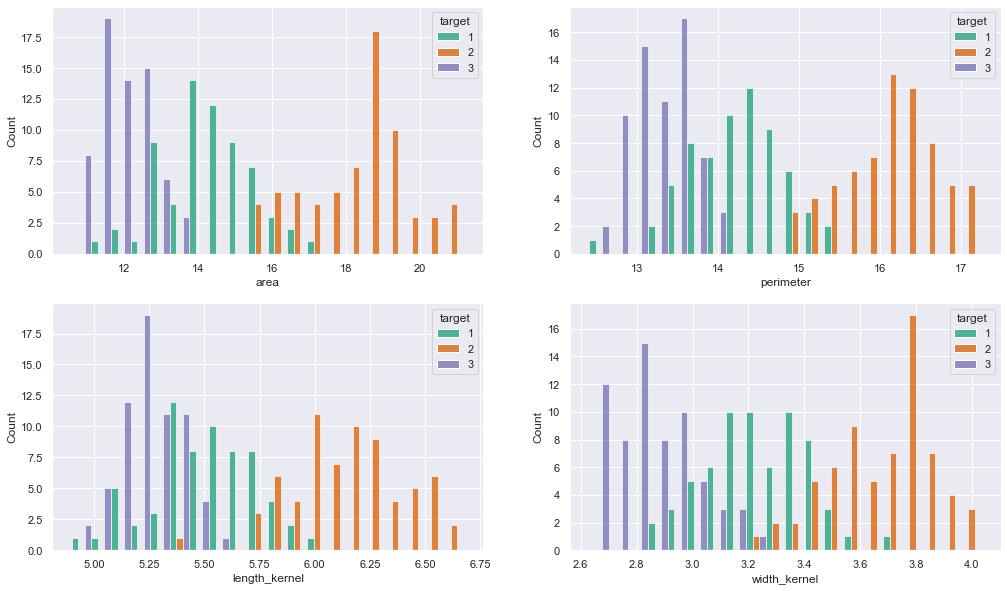

In [33]:
fig = plt.figure(figsize=(17,10))
plt.subplot(2,2,1)
sns.histplot(data=df,x="area",hue="target",multiple="dodge", bins=20, palette='Dark2')
plt.subplot(2,2,2)
sns.histplot(data=df,x="perimeter",hue="target",multiple="dodge", bins=20, palette='Dark2')
plt.subplot(2,2,3)
sns.histplot(data=df,x="length_kernel",hue="target",multiple="dodge", bins=20, palette='Dark2')
plt.subplot(2,2,4)
sns.histplot(data=df,x="width_kernel",hue="target",multiple="dodge", bins=20, palette='Dark2')

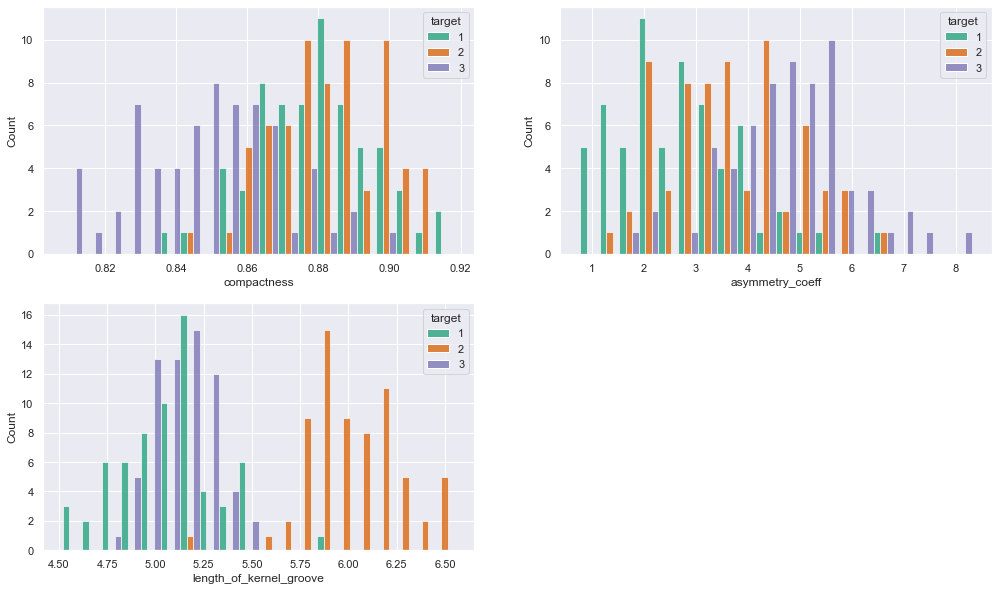

In [35]:
fig = plt.figure(figsize=(17,10))
plt.subplot(2,2,1)
sns.histplot(data=df,x="compactness",hue="target",multiple="dodge", bins=20, palette='Dark2')
plt.subplot(2,2,2)
sns.histplot(data=df,x="asymmetry_coeff",hue="target",multiple="dodge", bins=20, palette='Dark2')
plt.subplot(2,2,3)
sns.histplot(data=df,x="length_of_kernel_groove",hue="target",multiple="dodge", bins=20, palette='Dark2')

### From the distribution of the histogram plots above, we can see that the class separation with respect to compactness and asymmetry_coeff is not vert promising by its own. length_of_kernel_groove shows good class separation between class 2 and the rest of the class.

### From the above hist plot with perimeter, we can seem to find a couple of outliers that belong to class 1 or "kama". We will further investigate

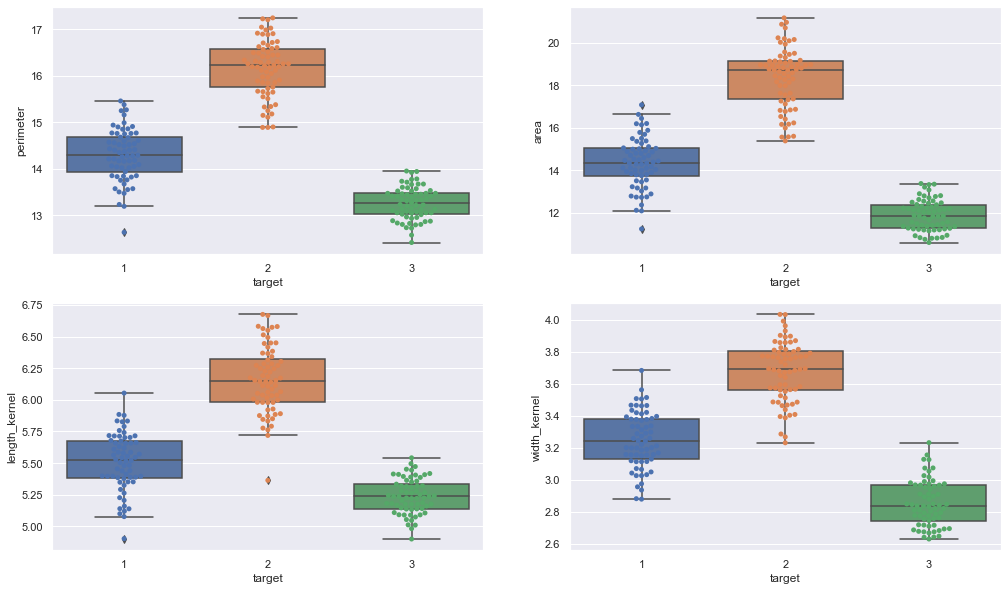

In [34]:
fig = plt.figure(figsize=(17,10))
plt.subplot(2,2,1)
ax = sns.boxplot(data=df, x="target",y="perimeter")
ax = sns.swarmplot(data=df,x="target",y="perimeter")
plt.subplot(2,2,2)
ax = sns.boxplot(data=df, x="target",y="area")
ax = sns.swarmplot(data=df,x="target",y="area")
plt.subplot(2,2,3)
ax = sns.boxplot(data=df, x="target",y="length_kernel")
ax = sns.swarmplot(data=df,x="target",y="length_kernel")
plt.subplot(2,2,4)
ax = sns.boxplot(data=df, x="target",y="width_kernel")
ax = sns.swarmplot(data=df,x="target",y="width_kernel")

### The points for perimeters below 13 can indeed be considered as outliers for class 1 ("kama") which is evident from the above plot. Similarly, length_kernel also has some outliers which is evident from the above plot.

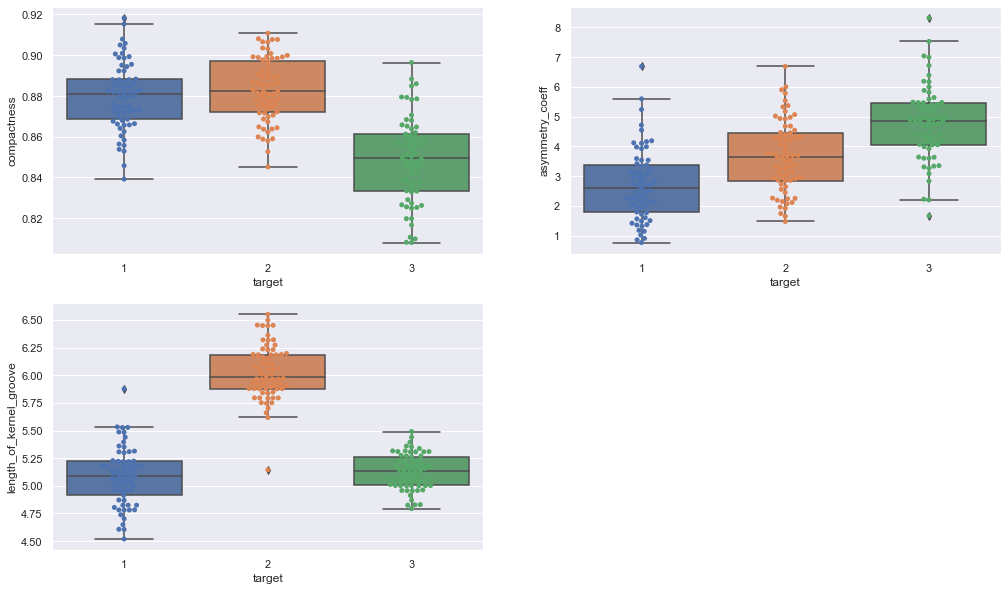

In [36]:
fig = plt.figure(figsize=(17,10))
plt.subplot(2,2,1)
ax = sns.boxplot(data=df, x="target",y="compactness")
ax = sns.swarmplot(data=df,x="target",y="compactness")
plt.subplot(2,2,2)
ax = sns.boxplot(data=df, x="target",y="asymmetry_coeff")
ax = sns.swarmplot(data=df,x="target",y="asymmetry_coeff")
plt.subplot(2,2,3)
ax = sns.boxplot(data=df, x="target",y="length_of_kernel_groove")
ax = sns.swarmplot(data=df,x="target",y="length_of_kernel_groove")

### From the above plot we have identified several other outliers from other features as well. We'll handle all these identified outliers.

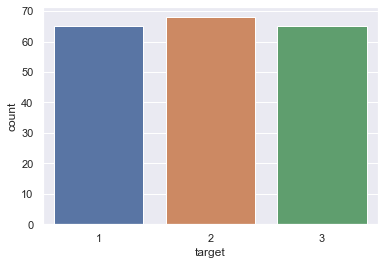

In [40]:
sns.countplot(data = df, x="target")

### There isn't any significant class imbalance in the data

# Outlier processing

In [62]:
df_1 = df[df["target"]==1]
df_2 = df[df["target"]==2]
df_3 = df[df["target"]==3]
thres_dict_1 = {"perimeter":[16,13],"area":[16.8,12],"length_kernel":[6,5],"length_of_kernel_groove":[5.75,4],"asymmetry_coeff":[6,0]}
thres_dict_2 = {"length_kernel":[6.75,5.50],"length_of_kernel_groove":[7,5.5]}
thres_dict_3 = {"asymmetry_coeff":[8,2]}

In [63]:
for k in list(thres_dict_1.keys()):
    for i in list(df_1.index):
        if df_1.loc[i,k] > thres_dict_1[k][0] or df_1.loc[i,k] < thres_dict_1[k][1]:
            df_1.loc[i,k] = np.nan

for k in list(thres_dict_2.keys()):
    for i in list(df_2.index):
        if df_2.loc[i,k] > thres_dict_2[k][0] or df_2.loc[i,k] < thres_dict_2[k][1]:
            df_2.loc[i,k] = np.nan

for k in list(thres_dict_3.keys()):
    for i in list(df_3.index):
        if df_3.loc[i,k] > thres_dict_3[k][0] or df_3.loc[i,k] < thres_dict_3[k][1]:
            df_3.loc[i,k] = np.nan

In [64]:
df = pd.concat([df_1,df_2,df_3])

In [65]:
df = df.dropna()
df.describe(include='all')

,area,perimeter,compactness,length_kernel,width_kernel,asymmetry_coeff,length_of_kernel_groove,target
count,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000
mean,14.936911,14.607696,0.870258,5.649654,3.264382,3.699797,5.429565,2.010471
std,2.951330,1.322467,0.023314,0.446031,0.382046,1.426179,0.496522,0.807788
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.330000,13.465000,0.856550,5.267000,2.954500,2.664000,5.046000,1.000000
50%,14.430000,14.370000,0.872600,5.545000,3.242000,3.639000,5.263000,2.000000
75%,17.630000,15.860000,0.886300,6.011500,3.564500,4.799000,5.879500,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,7.524000,6.550000,3.000000


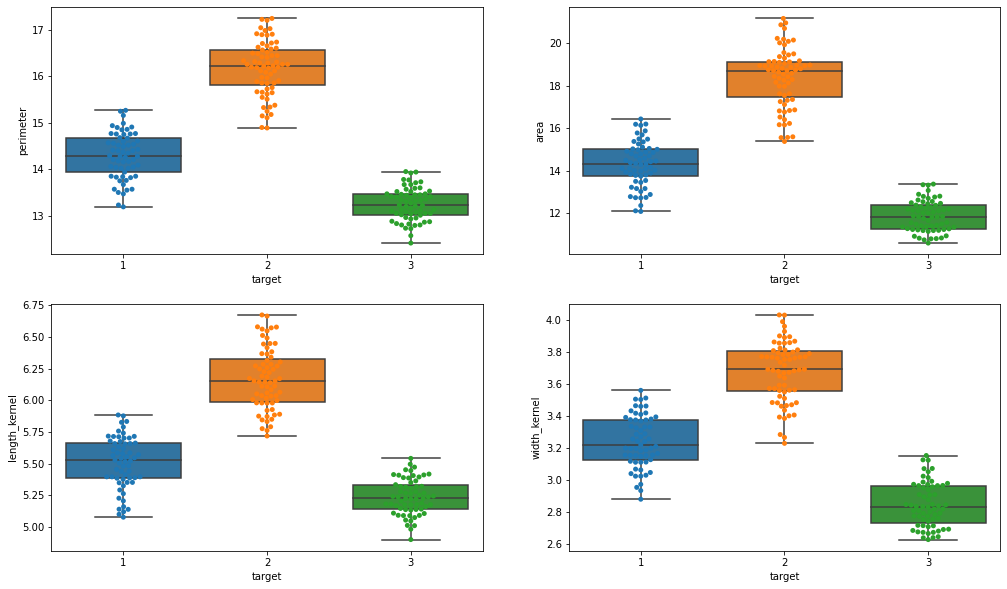

In [66]:
fig = plt.figure(figsize=(17,10))
plt.subplot(2,2,1)
ax = sns.boxplot(data=df, x="target",y="perimeter")
ax = sns.swarmplot(data=df,x="target",y="perimeter")
plt.subplot(2,2,2)
ax = sns.boxplot(data=df, x="target",y="area")
ax = sns.swarmplot(data=df,x="target",y="area")
plt.subplot(2,2,3)
ax = sns.boxplot(data=df, x="target",y="length_kernel")
ax = sns.swarmplot(data=df,x="target",y="length_kernel")
plt.subplot(2,2,4)
ax = sns.boxplot(data=df, x="target",y="width_kernel")
ax = sns.swarmplot(data=df,x="target",y="width_kernel")

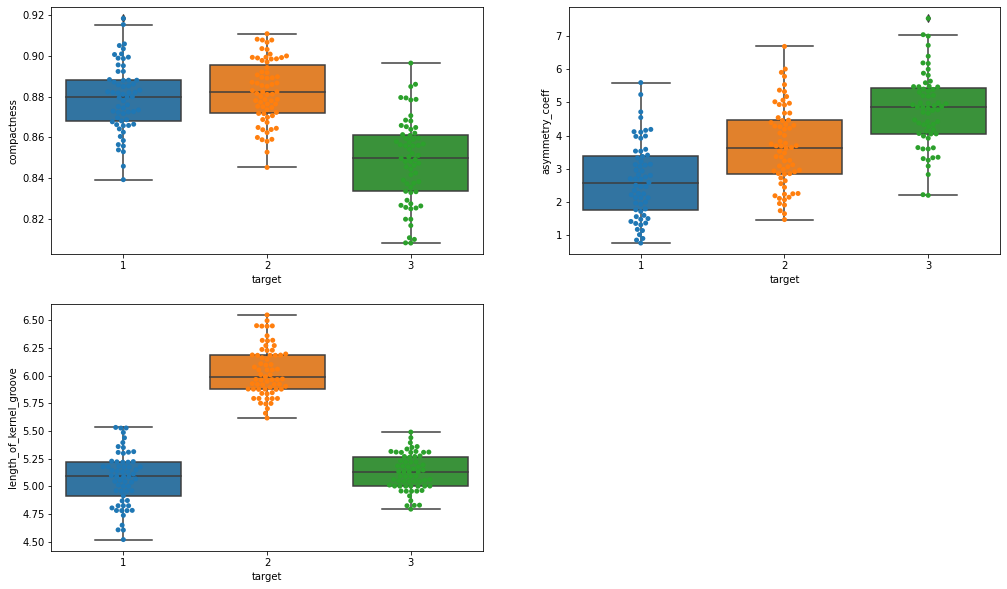

In [67]:
fig = plt.figure(figsize=(17,10))
plt.subplot(2,2,1)
ax = sns.boxplot(data=df, x="target",y="compactness")
ax = sns.swarmplot(data=df,x="target",y="compactness")
plt.subplot(2,2,2)
ax = sns.boxplot(data=df, x="target",y="asymmetry_coeff")
ax = sns.swarmplot(data=df,x="target",y="asymmetry_coeff")
plt.subplot(2,2,3)
ax = sns.boxplot(data=df, x="target",y="length_of_kernel_groove")
ax = sns.swarmplot(data=df,x="target",y="length_of_kernel_groove")

### Outliers have been removed.

# Normalization

In [86]:
feature_cols = list(df.columns)
target_col = feature_cols.pop()
df_feat = df[feature_cols]
df_target = df.drop(columns = feature_cols)

In [87]:
#df_feat = df_feat.drop(columns = ["asymmetry_coeff"])

In [88]:
for i in list(df_feat.columns):
    df_feat[i] = scipy.stats.zscore(df_feat.loc[:,i].values)
df_norm = pd.concat([df_feat,df_target],axis=1)

In [89]:
df_norm

,area,perimeter,compactness,length_kernel,width_kernel,asymmetry_coeff,length_of_kernel_groove,target
0,-0.019334,-0.028579,0.466258,-0.215020,0.180078,-1.885349,-0.956273,1
1,-0.219769,-0.392491,1.494083,-0.806215,0.190576,-0.703577,-1.220801,1
2,-0.372643,-0.506214,1.085533,-0.732034,0.300799,-1.012905,-1.261187,1
3,0.408714,0.289843,1.425274,0.018760,0.781058,-1.648432,-0.514045,1
4,-0.189194,-0.301513,1.068331,-0.592665,0.124967,-0.870192,-0.956273,1
...,...,...,...,...,...,...,...,...
192,-0.872033,-0.862544,-0.583070,-1.001781,-0.798811,0.154104,-0.865404,3
193,-0.933183,-1.067245,0.345843,-1.152389,-0.743699,-0.048365,-1.129933,3
194,-1.259315,-1.309853,-0.823899,-1.145646,-1.231831,0.439528,-0.861365,3
196,-1.052085,-1.059663,-0.780894,-1.066969,-1.124232,-0.071565,-0.778574,3


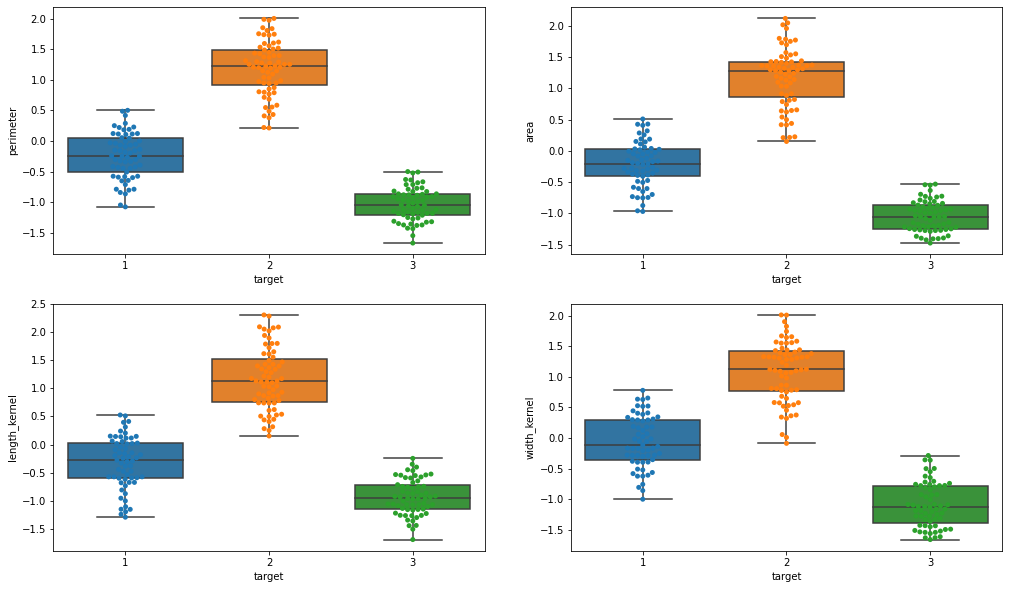

In [90]:
fig = plt.figure(figsize=(17,10))
plt.subplot(2,2,1)
ax = sns.boxplot(data=df_norm, x="target",y="perimeter")
ax = sns.swarmplot(data=df_norm,x="target",y="perimeter")
plt.subplot(2,2,2)
ax = sns.boxplot(data=df_norm, x="target",y="area")
ax = sns.swarmplot(data=df_norm,x="target",y="area")
plt.subplot(2,2,3)
ax = sns.boxplot(data=df_norm, x="target",y="length_kernel")
ax = sns.swarmplot(data=df_norm,x="target",y="length_kernel")
plt.subplot(2,2,4)
ax = sns.boxplot(data=df_norm, x="target",y="width_kernel")
ax = sns.swarmplot(data=df_norm,x="target",y="width_kernel")

In [91]:
X_train,X_test,Y_train,Y_test = train_test_split(df_feat,df_target, test_size = 0.2, random_state= 225)

Text(0, 0.5, 'Accuracy')

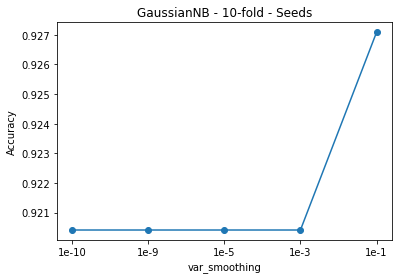

In [92]:
#GaussianNB
kf = KFold(n_splits=10)
performance_dict = {}
var_sm_list = [1e-10, 1e-9, 1e-5, 1e-3, 1e-1]
for var_sm in var_sm_list:
    acc = []
    for train_index,val_index in kf.split(X_train):
        clf = GaussianNB(var_smoothing=var_sm)
        X_Tr = X_train.iloc[train_index,:]
        Y_Tr = Y_train.iloc[train_index,:]
        X_V = X_train.iloc[val_index,:]
        Y_V = Y_train.iloc[val_index,:]
        clf = clf.fit(X_Tr, Y_Tr)
        Y_P = clf.predict(X_V)
        acc.append(metrics.accuracy_score(Y_V, Y_P))
    performance_dict[var_sm] = np.mean(acc)
accuracies = list(performance_dict.values())
plt.title("GaussianNB - 10-fold - Seeds")
plt.plot([1,2,3,4,5], accuracies, marker='o')
plt.xticks([1,2,3,4,5],['1e-10','1e-9','1e-5','1e-3','1e-1'])
plt.xlabel('var_smoothing')
plt.ylabel('Accuracy')

In [93]:
clf = GaussianNB(var_smoothing=1e-1)
clf = clf.fit(X_train,Y_train)
Y_P = clf.predict(X_test)
GNB_Test = metrics.accuracy_score(Y_test, Y_P)
print("Gaussian Naive Bayes Test Accuracy at  var_smoothing of 1e-1 is...", GNB_Test)

Gaussian Naive Bayes Test Accuracy at  var_smoothing of 1e-1 is... 0.9743589743589743


# With no preprocessing

In [94]:
df = pd.read_csv('seeds_dataset.txt', sep="\t", error_bad_lines=False, warn_bad_lines=True)

# To construct the data, seven geometric parameters of wheat kernels were measured:
# 1. area A,
# 2. perimeter P,
# 3. compactness C = 4*pi*A/P^2,
# 4. length of kernel,
# 5. width of kernel,
# 6. asymmetry coefficient
# 7. length of kernel groove.

# target (three different varieties of wheat): Kama (1), Rosa (2) and Canadian (3)

df.columns=['area','perimeter','compactness','length_kernel','width_kernel','asymmetry_coeff','length_of_kernel_groove','target']
feature_nms = ['area','perimeter','compactness','length_kernel','width_kernel','asymmetry_coeff','length_of_kernel_groove']
class_nms = ['Kama','Rosa','Canadian']

feature_cols = list(df.columns)
target_col = feature_cols.pop()
df_feat = df[feature_cols]
df_target = df.drop(columns = feature_cols)
X_train,X_test,Y_train,Y_test = train_test_split(df_feat,df_target, test_size = 0.2, random_state= 225)

b'Skipping line 8: expected 8 fields, saw 10\nSkipping line 36: expected 8 fields, saw 10\nSkipping line 61: expected 8 fields, saw 9\nSkipping line 69: expected 8 fields, saw 9\nSkipping line 107: expected 8 fields, saw 9\nSkipping line 136: expected 8 fields, saw 9\nSkipping line 170: expected 8 fields, saw 9\nSkipping line 171: expected 8 fields, saw 9\nSkipping line 173: expected 8 fields, saw 9\nSkipping line 202: expected 8 fields, saw 9\nSkipping line 204: expected 8 fields, saw 9\n'


Text(0, 0.5, 'Accuracy')

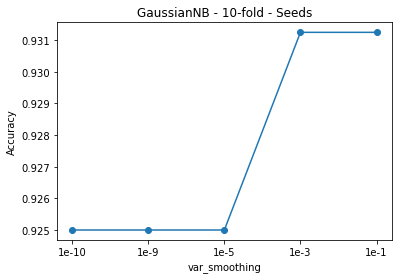

In [95]:
#GaussianNB
kf = KFold(n_splits=10)
performance_dict = {}
var_sm_list = [1e-10, 1e-9, 1e-5, 1e-3, 1e-1]
for var_sm in var_sm_list:
    acc = []
    for train_index,val_index in kf.split(X_train):
        clf = GaussianNB(var_smoothing=var_sm)
        X_Tr = X_train.iloc[train_index,:]
        Y_Tr = Y_train.iloc[train_index,:]
        X_V = X_train.iloc[val_index,:]
        Y_V = Y_train.iloc[val_index,:]
        clf = clf.fit(X_Tr, Y_Tr)
        Y_P = clf.predict(X_V)
        acc.append(metrics.accuracy_score(Y_V, Y_P))
    performance_dict[var_sm] = np.mean(acc)
accuracies = list(performance_dict.values())
plt.title("GaussianNB - 10-fold - Seeds")
plt.plot([1,2,3,4,5], accuracies, marker='o')
plt.xticks([1,2,3,4,5],['1e-10','1e-9','1e-5','1e-3','1e-1'])
plt.xlabel('var_smoothing')
plt.ylabel('Accuracy')

In [96]:
clf = GaussianNB(var_smoothing=1e-3)
clf = clf.fit(X_train,Y_train)
Y_P = clf.predict(X_test)
GNB_Test = metrics.accuracy_score(Y_test, Y_P)
print("Gaussian Naive Bayes Test Accuracy at  var_smoothing of 1e-3 is...", GNB_Test)

Gaussian Naive Bayes Test Accuracy at  var_smoothing of 1e-3 is... 0.875
